In [24]:
import numpy as np
from numba import jit
from scipy.sparse import csr_matrix

k = 5


def generate_A(N):
    h = 1 / N
    size = (N - 1) ** 2
    const = h ** 2 * k ** 2
    A = np.zeros((size, size))
    for i in range(size):
        for j in range(i, size):
            if i == j:
                A[i, j] = A[j, i] = (24 - 4 * const) / 9
            elif (i == j - 1 and j % (N - 1) != 0) or j - i == N - 1:
                A[i, j] = A[j, i] = (-3 - const) / 9
            elif (j - i == N and j % (N - 1) != 0) or (j - i == N - 2 and i % (N - 1) != 0):
                A[i, j] = A[j, i] = (-12 - const) / 36
    return csr_matrix(A)


@jit(nopython=True)
def generate_b(N):
    def func_g(x, y):
        return np.sin(3 * x + 4 * y)

    h = 1 / N
    # nnz = 4 * (N - 2)
    size = (N - 1) ** 2
    data = np.zeros(size)

    const = h ** 2 * k ** 2
    const1 = (12 + const) / 36
    const2 = (3 + const) / 9

    for condition in range(4):
        for i in range(N - 2):
            g1 = 0
            position = i + 1
            if condition == 0:
                if position == 1:
                    g1 = func_g(0, 0)
                    g2 = func_g(h, 0) + func_g(0, h)
                else:
                    g2 = func_g(position * h, 0)
                row_index = position - 1
            elif condition == 1:
                if position == 1:
                    g1 = func_g(1, 0)
                    g2 = func_g(1 - h, 0) + func_g(1, h)
                else:
                    g2 = func_g(1, position * h)
                row_index = position * (N - 1) - 1
            elif condition == 2:
                if position == 1:
                    g1 = func_g(1, 1)
                    g2 = func_g(1 - h, 1) + func_g(1, 1 - h)
                else:
                    g2 = func_g(position * h, 1)
                row_index = (N - 1) ** 2 - position
            else:
                position += 1
                if position == N - 1:
                    g1 = func_g(0, 1)
                    g2 = func_g(h, 1) + func_g(0, 1 - h)
                else:
                    g2 = func_g(0, position * h)
                row_index = (N - 1) * (position - 1)

            data[row_index] = g1 * const1 + g2 * const2

    return data



* solve the matrix-vector problem for $N=4$, $N=8$, and $N=16$

* plot the approximate solutions to the Helmholtz problem.

In [25]:
def solve_x(N):
    A = generate_A(N)
    b = generate_b(N)
    u = spsolve(A, b).reshape((N - 1, N - 1))
    return u

  0%|          | 0/5 [00:00<?, ?it/s]

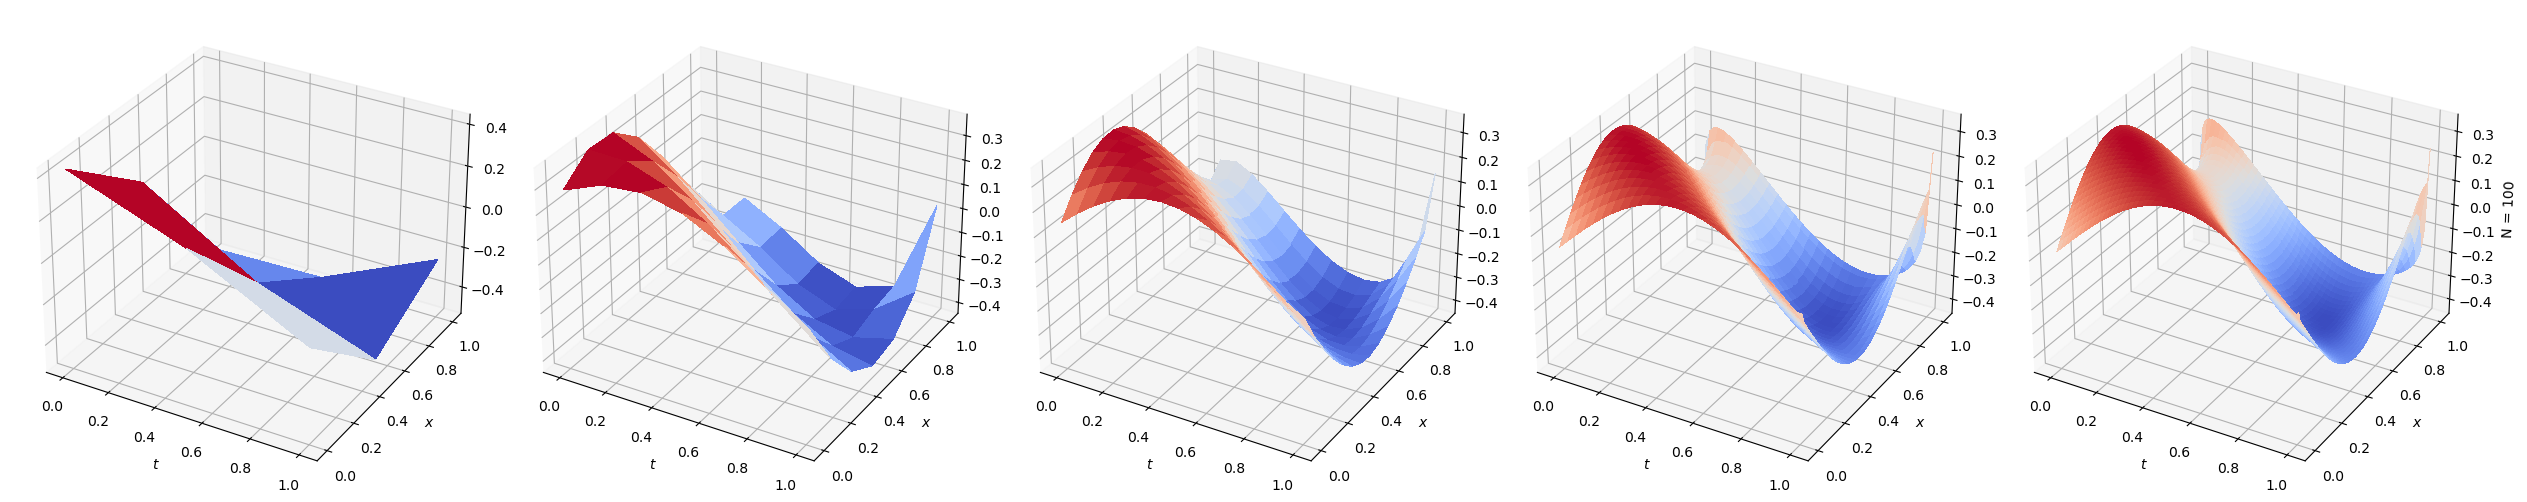

In [26]:
% matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.sparse.linalg import spsolve
from tqdm.notebook import tqdm

Ns = [4, 8, 16, 55, 100]


def plot():
    fig = plt.figure(figsize=(5 * len(Ns), 22))

    for i, N in enumerate(tqdm(Ns)):
        u = solve_x(N)

        ticksX = ticksY = np.linspace(0, 1, N - 1)
        X, Y = np.meshgrid(ticksX, ticksY)

        ax = fig.add_subplot(1, len(Ns), i + 1, projection='3d')
        ax.plot_surface(X, Y, u, antialiased=False, cmap=cm.coolwarm)
        ax.set_xlabel(r'$t$')
        ax.set_ylabel(r'$x$')
        ax.set_zlabel(r'N = {}'.format(N))
    fig.tight_layout(h_pad=4)
    plt.show()


plot()

* solve the matrix-vector problem with small to medium-sized value of $N$ using a range of different solvers of your choice

    * at least **5** matrix-vector solvers:
        * at least **2** of these should be **iterative** solvers, at least **1** should be a **direct** solver.
        * use some solvers from the Scipy library and some from **PETSc**.

* measuring factors you deem to be important for your evaluation.

    * factors should include the **time** taken by the solver,

        * may additionally include many other things, such as:

          1. the number of **iterations**
          2. the size of the **residual** after each iteration


* Make a set of plots that show the measurements you have made and allow you to compare the solvers.



spsolve
PETSc!
numpy的解法？或者PETSc多选几个
iterative: cg gmres

In [1]:
!pip install petsc4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 4.9 MB/s 
     |████████████████████████████████| 18.4 MB 495 kB/s 
     |████████████████████████████████| 2.5 MB 34.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for petsc4py
  Running setup.py clean for petsc4py
  ERROR: Failed building wheel for petsc
  Running setup.py clean for petsc
  Created wheel for mpi4py: filename=mpi4py-3.1.4-cp38-cp38-linux_x86_64.whl size=4438517 sha256=f0dde4714db7b82adf3373ab954f6207498f61f38725cc4ef466583a861629d9
  Stored in directory: /root/.cache/pip/wheels/f3/35/48/0b9a7076995eea5ea64a7e4bc3f0f342f453080795276264e7
Successfully built mpi4py
Failed to build petsc4py petsc
    Running setup.py install for petsc ... done
  DEPRECATION: petsc was installed using the legacy 'setup.py install'

  0%|          | 0/10 [00:00<?, ?it/s]

dgmres : [5.53680001758039e-05, 9.706800119602121e-05, 0.00012220700045872945, 0.00018419400112179574, 0.00016581699856033083, 0.0002162609998777043, 0.0003057549984077923, 0.00038115999996080063, 0.0005286670002533356, 0.0009083479999389965]
cg : [4.0980999983730726e-05, 3.274899972893763e-05, 3.8622998545179144e-05, 4.4242000512895174e-05, 3.244700019422453e-05, 4.069699934916571e-05, 5.8084999182028696e-05, 8.204900041164365e-05, 0.00010113099961017724, 0.00014435799857892562]
cr : [3.7615000110235997e-05, 4.3807000110973604e-05, 6.887299969093874e-05, 8.655300007376354e-05, 6.618000043090433e-05, 8.840699956635945e-05, 0.00012881799921160564, 0.00017922699953487609, 0.00022381300004781224, 0.000298728000416304]
nash : [2.6154999432037584e-05, 2.813299943227321e-05, 3.4974998925463296e-05, 5.0524000471341424e-05, 3.055100023630075e-05, 4.301999979361426e-05, 5.300299926602747e-05, 7.401100083370693e-05, 0.00011217799874430057, 0.00012897000124212354]
richardson : [2.3321999833569862

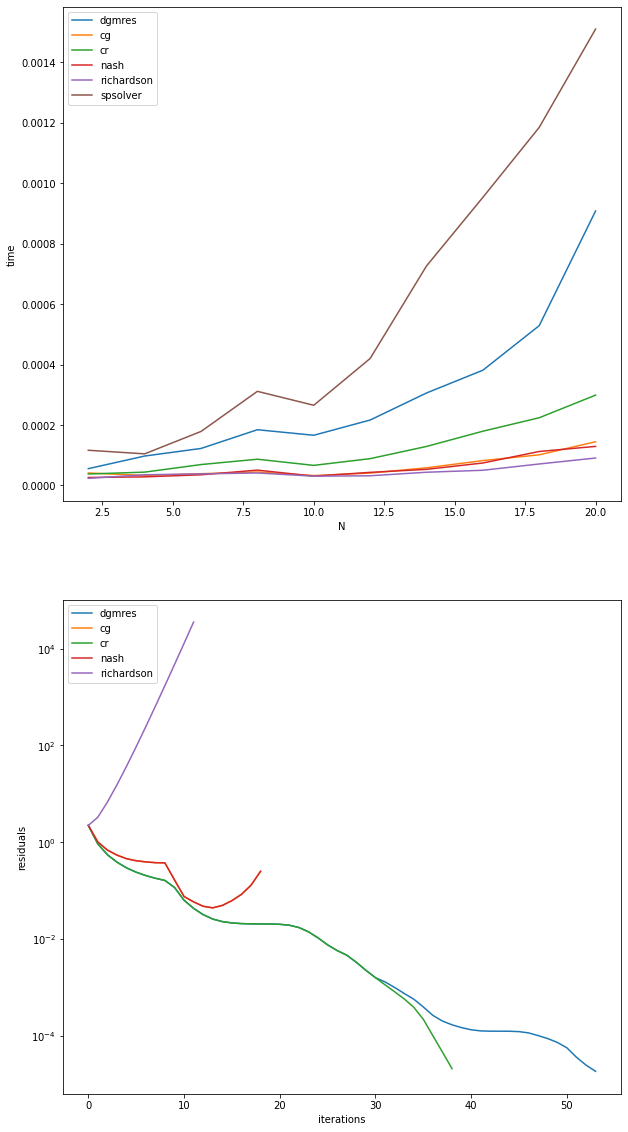

In [73]:
% matplotlib inline
import matplotlib.pyplot as plt
import timeit
from petsc4py import PETSc
from scipy.sparse.linalg import spsolve
from tqdm.notebook import tqdm

Ns = np.linspace(2, 20, 10, dtype=np.int32)


class Solver:
    def __init__(self, name: str):
        self.name = name
        self.times = []
        self.solution = []
        self.error = []
        self.PC = 'none'
        self.residuals = None


def test_solvers():
    PET_solvers = [Solver(name) for name in ['dgmres', 'cg', 'cr', 'nash', 'richardson']]
    sp = Solver('spsolver')
    for N in tqdm(Ns):
        A = generate_A(N)
        b = generate_b(N)

        sp.solution += [spsolve(A, b)]
        sp.times += [timeit.Timer(lambda: spsolve(A, b)).timeit(1)]

        AA = PETSc.Mat()
        AA.createAIJWithArrays(A.shape, (A.indptr, A.indices, A.data))
        bb = AA.createVecLeft()
        bb.array[:] = b

        for pet_solver in PET_solvers:
            ksp = PETSc.KSP().create()
            ksp.setOperators(AA)
            pet_solver.solution.append(AA.createVecRight())

            ksp.setType(pet_solver.name)
            ksp.getPC().setType(pet_solver.PC)
            ksp.setConvergenceHistory()

            pet_solver.times += [timeit.Timer(lambda: ksp.solve(bb, pet_solver.solution[-1])).timeit(1)]
            pet_solver.residuals += [ksp.getConvergenceHistory()]

    PET_solvers.append(sp)

    fig = plt.figure(figsize=(10, 20))

    plt.subplot(2, 1, 1)
    ps = []
    for i, sv in enumerate(PET_solvers):
        print('{} : {}'.format(sv.name, sv.times))
        p0, = plt.plot(Ns, sv.times)
        ps += [p0]

    plt.legend(ps, [sv.name for sv in PET_solvers], loc='upper left')
    plt.ylabel('time')
    plt.xlabel('N')

    plt.subplot(2, 1, 2)
    ps = []
    for i, sv in enumerate(PET_solvers):
        if i == len(PET_solvers) - 1: continue
        p0, = plt.semilogy(sv.residuals)
        ps += [p0]
    plt.legend(ps, [sv.name for sv in PET_solvers], loc='upper left')

    plt.ylabel('residuals')
    plt.xlabel('iterations')

    plt.show()


test_solvers()


* For two of the iterative solvers you have chosen to use, repeat the comparisons with three different choices of preconditioner.

In [ ]:
% matplotlib inline
import matplotlib.pyplot as plt
import timeit
from petsc4py import PETSc
from scipy.sparse.linalg import spsolve
from tqdm.notebook import tqdm

Ns = np.linspace(2, 20, 10, dtype=np.int32)


class Solver:
    def __init__(self, name: str):
        self.name = name
        self.times = []
        self.error = []
        self.PC = 'none'


def calculate_error(sol, N):
    x = y = np.linspace(0, 1, N)
    u_exact = np.sin(3 * x + 4 * y)


def test_solvers():
    PET_solvers = [Solver(name) for name in ['cg', 'nash']]

    for N in tqdm(Ns):
        A = generate_A(N)
        b = generate_b(N)

        AA = PETSc.Mat()
        AA.createAIJWithArrays(A.shape, (A.indptr, A.indices, A.data))
        bb = AA.createVecLeft()
        bb.array[:] = b

        for pet_solver in PET_solvers:
            ksp = PETSc.KSP().create()
            ksp.setOperators(AA)
            pet_solver.solution = AA.createVecRight()

            ksp.setType(pet_solver.name)
            ksp.getPC().setType(pet_solver.PC)

            pet_solver.times += [timeit.Timer(lambda: ksp.solve(bb, pet_solver.solution)).timeit(1)]

    fig = plt.figure(figsize=(10, 20))

    ps = []
    for i, sv in enumerate(PET_solvers):
        print('{} : {}'.format(sv.name, sv.times))
        p0, = plt.plot(Ns, sv.times)
        ps += [p0]

    plt.legend(ps, [sv.name for sv in PET_solvers], loc='upper left')
    plt.ylabel('time')
    plt.xlabel('N')


test_solvers()


  0%|          | 0/3 [00:00<?, ?it/s]

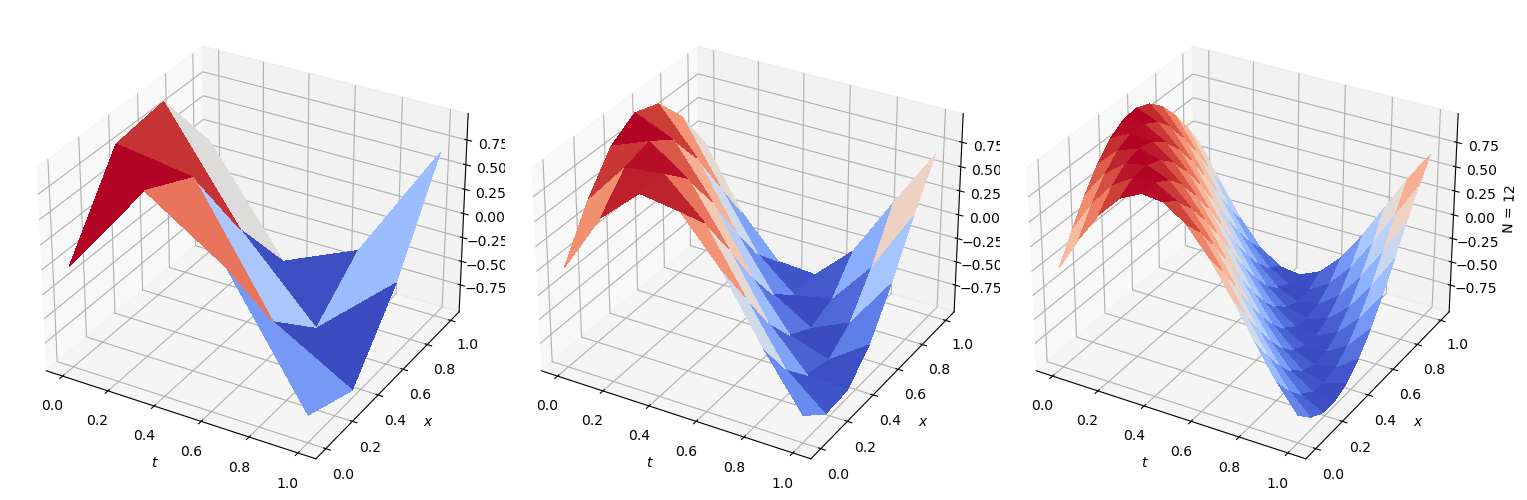

In [30]:
import numpy as np


def get_true_u(N):
    u_exact = np.zeros((N, N))
    for i, x in enumerate(np.linspace(0, 1, N)):
        for j, y in enumerate(np.linspace(0, 1, N)):
            u_exact[i, j] = np.sin(3 * x + 4 * y)
    return u_exact


def calculate_error(u, N):
    error_mat = u - get_true_u(N-1)

